[13, 27, 48, 0, 4, 5, 7, 10, 36, 34, 34, 59, 27, 42, 10, 43, 22, 52, 32, 56, 54, 48, 45, 52, 8, 3, 30, 1, 41, 27, 42, 22, 7, 9, 0, 36, 32, 55, 45, 11, 24, 5, 18, 31, 54, 32, 42, 63, 12, 50, 64, 53, 44, 1, 25, 18, 48, 20, 22, 52, 5, 47, 6, 47, 16, 15, 47, 62, 20, 45, 13, 15, 1, 10, 11, 3, 29, 1, 45, 38, 50, 49, 12, 25, 61, 16, 22, 35, 3, 24, 21, 1, 39, 29, 32, 58, 17, 7, 50, 60, 59, 60, 25, 53, 28, 18, 54, 61, 49, 15, 52, 14, 12, 48, 18, 38, 15, 11, 13, 41, 14, 10, 37, 29, 29, 53, 19, 41, 1, 31, 46, 0, 44, 39, 21, 22, 41, 45, 10, 30, 46, 34, 10, 2, 44, 25, 54, 63, 21, 53, 62, 7, 46, 40, 45, 12, 55, 1, 58, 11, 11, 42, 12, 61, 13, 4, 13, 48, 31, 48, 14, 0, 44, 18, 29, 50, 46, 3, 59, 54, 33, 56, 4, 7, 12, 39, 21, 25, 36, 44, 29, 57, 18, 3, 54, 10, 21, 51, 50, 55, 39, 30, 32, 24, 51, 16, 35, 19, 42, 55, 3, 0, 0, 58, 11, 17, 1, 45, 61, 3, 54, 36, 27, 31, 2, 43, 56, 54, 55, 14, 27, 45, 41, 37, 3, 15, 26, 43, 48, 39, 62, 29, 5, 44, 21, 1, 39, 1, 27, 5, 20, 45, 27, 61, 18, 29, 40, 44, 3, 36, 45

<Figure size 1000x700 with 0 Axes>

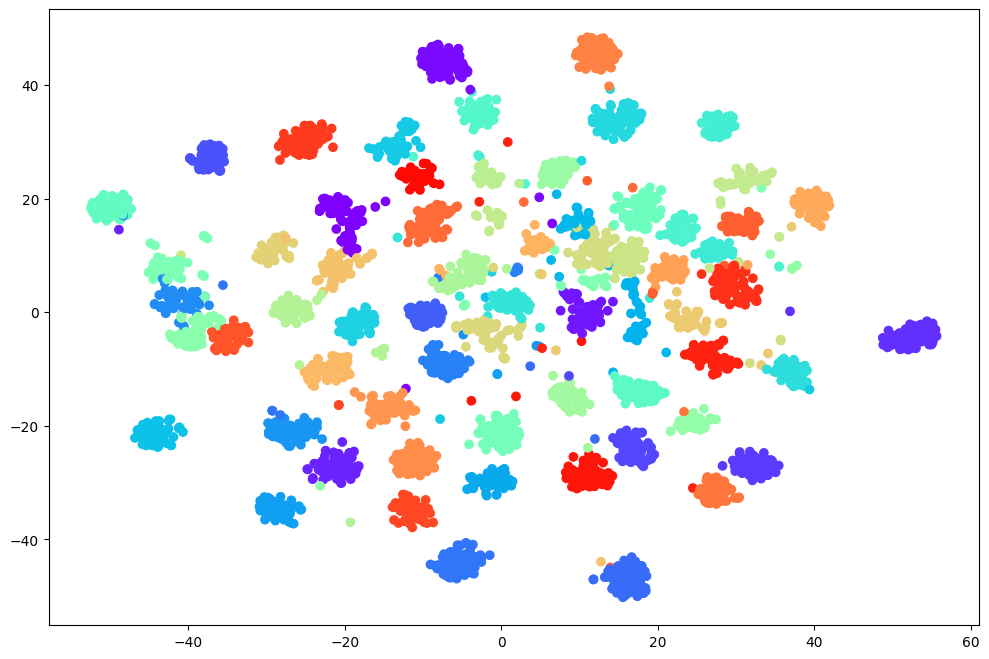

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from sklearn.manifold import TSNE
import csv
import sys

csv.field_size_limit(sys.maxsize)

cmap = plt.get_cmap('rainbow')

# Create a scatter plot with colors based on labels using the qualitative colormap
plt.figure(figsize=(10, 7))

# Load data from the given format
data = []
labels = []
with open('p1_results_2/C_ep200_train.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        feature_vector = np.array(eval(row['features']))  # Convert the string representation to a list
        # print(feature_vector)
        # print(len(feature_vector))
        data.append(feature_vector)
        labels.append(int(row['label']))

print(labels)
unique_labels = list(set(labels))
color_map = {label: cmap(i / len(unique_labels)) for i, label in enumerate(unique_labels)}  # Map each label to a unique color
colors = [color_map[label] for label in labels]


# Convert data to numpy array
data = np.array(data)
# print(data)

# Perform t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
data_2d = tsne.fit_transform(data)

# Create a scatter plot with colors based on labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=colors, marker='o', alpha=1, edgecolors=None)

# display = []
# for i in range(len(data_2d)):
#     print(i)
#     if str(labels[i]) in display:
#         continue
    
#     display.append(str(labels[i]))
#     plt.text(data_2d[i, 0], data_2d[i, 1], str(labels[i]), fontsize=9, ha='right', va='bottom')


# plt.colorbar(scatter)
# plt.title('t-SNE plot of Features')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()